#HEADER NOTE

*   Performed Image Normalization on both training and validation data.
*   Added L2 regularization to the loss function.
*   Already assignment 4 code had relu after BN.
*   Identified the top 25 misclassified images from validation data set and created an image gallery from them.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
# Installing Keras which is open-source neural-network library written in Python.
!pip install -q keras

# Importing the keras library.
import keras

Using TensorFlow backend.


In [0]:
# Importing NumPy (Numerical Python) which is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It also gives an alias to the library.
import numpy as np

# There are two main types of models available in Keras: the Sequential model and the Model class used with the functional API.
# Sequential model is a linear stack of layers. Importing Sequential model from Keras.
from keras.models import Sequential

# Importing different layers from Keras.
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization

# Importing the utils library of Keras.
from keras.utils import np_utils

# Importing the callbacks of Keras.
from keras.callbacks import ModelCheckpoint

# Importing the preprocessing library of Keras for Image Augmentation 
from keras.preprocessing.image import ImageDataGenerator

# Importing l2 regularizer from Keras
from keras.regularizers import l2

# MNIST is a database of handwritten digits. It is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Importing MNIST dataset from Keras.
from keras.datasets import mnist

# backend
from keras import backend as k

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Loading the MNIST 60000 Training and 10000 Test data into respective numpy arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
8


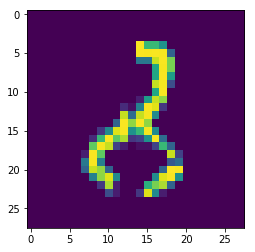

In [9]:
# Printing the shape of the Training data
print (X_train.shape)
print(y_test[582])

# Matplotlib is a plotting library for Python. Pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
from matplotlib import pyplot as plt

# Sets the backend of matplotlib to 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline

# Renders the image.
plt.imshow(X_test[582])

In [0]:
# Reshaping the Training and Test data to add the channel parameter as the input to Conv2D layer is expected to be of shape (img_rows, img_cols, num_channels) if data_format="channels_last" which is default.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Normalizing the Training and Test values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
# Printing the first 10 labelled Training data
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# np.utils.to_categorical is used to convert array of labelled data (from 0 to nb_classes-1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
# Printing the first 10 labelled Training data after converting to one-hot vector.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
batch_size = 128
num_epochs = 40
training_samples = 60000
validation_samples = 10000

In [16]:
from keras.layers import Activation

# Defining the model/network using (3,3) and (1,1) convolution layers, dropout, batchnormalization and 'relu' activation
model = Sequential()

model.add(Convolution2D(8, 3, input_shape=(28,28,1), use_bias=False)) # RF - 3X3, O/P - 26x26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, use_bias=False)) # RF - 5X5, O/P - 24x24
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, use_bias=False)) # RF - 7X7, O/P - 22x22
model.add(Activation('relu'))

model.add(Convolution2D(8, 1, use_bias=False))
model.add(MaxPooling2D(pool_size = (2, 2), strides=None, padding='valid', data_format=None)) # RF - 14X14, O/P - 11x11

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(8, 3, use_bias=False)) # RF - 16X16, O/P - 9X9
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Convolution2D(10, 3, use_bias=False)) # RF - 18X18, O/P - 7X7
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, use_bias=False)) # RF - 20X20, O/P - 5X5
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Convolution2D(10, 1, use_bias=False)) # RF - 20X20, O/P - 5X5
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(10, 5, use_bias=False)) # RF - 20X20, O/P - 5X5

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        720       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 10)        0         
__________

In [0]:
# Custom loss function to add L2 regularization to cross entropy loss
def custom_loss_function(actual,predicted):
  squared_weight = 0
  for layer in model.layers:
    squared_weight = squared_weight + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))
  hyperparam = 1.5e-4 # lambda_hyperparam / (2 * batch_size)
  L2_regularization = hyperparam * squared_weight
  Loss = keras.losses.categorical_crossentropy(actual,predicted) + L2_regularization
  return Loss

In [0]:
# Compiling the model
# Loss function is one of the arguments required for compiling a model. categorical_crossentropy loss function is used if the targets are one-hot encoded.
# Optimizer is one of the arguments required for compiling a model. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
# A metric is a function that is used to judge the performance of your model.
model.compile(loss=custom_loss_function,
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
# Mounting the Google Drive to save the weights
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/Assignment5:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

In [0]:
# Create generator that centers pixel values
datagen = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
)

In [0]:
# Calculate the mean on the training dataset
datagen.fit(X_train)

In [0]:
# Calculate the mean on the test dataset
datagen.fit(X_test)

In [0]:
# Generates batches of augmented training images
train_generator = datagen.flow(X_train, Y_train, batch_size=batch_size, shuffle=False)

In [0]:
# Generates batches of augmented test images
validation_generator = datagen.flow(X_test, Y_test, batch_size=batch_size, shuffle=False)

In [27]:
model.fit_generator(train_generator, steps_per_epoch=np.ceil(training_samples / batch_size), 
                        validation_data=validation_generator,
                        validation_steps=np.ceil(validation_samples / batch_size),
                        epochs=num_epochs, verbose=1,
                        callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
469/469 [==============================] - 11s 23ms/step - loss: 0.5792 - acc: 0.8266 - val_loss: 0.1652 - val_acc: 0.9606

Epoch 00001: val_acc improved from -inf to 0.96060, saving model to /content/gdrive/My Drive/Assignment5:001-val_acc:0.961.hdf5
Epoch 2/40
469/469 [==============================] - 7s 15ms/step - loss: 0.1771 - acc: 0.9572 - val_loss: 0.1158 - val_acc: 0.9747

Epoch 00002: val_acc improved from 0.96060 to 0.97470, saving model to /content/gdrive/My Drive/Assignment5:002-val_acc:0.975.hdf5
Epoch 3/40
469/469 [==============================] - 7s 15ms/step - loss: 0.1366 - acc: 0.9688 - val_loss: 0.1040 - val_acc: 0.9789

Epoch 00003: val_acc improved from 0.97470 to 0.97890, saving model to /content/gdrive/My Drive/Assignment5:003-val_acc:0.979.hdf5
Epoch 4/40
469/469 [==============================] - 7s 15ms/step - loss: 0.1182 - acc: 0.9739 - val_loss: 0.0933 - val_acc: 0.9811

Epoch 00004: val_acc impr

# HYPERPARAMETER IN L2 REGULARIZATION

Tried with three values - 1e-4, 1e-3 and 1.5e-4. All of them resulted in similar validation accuracy.

In [0]:
# Loading the best saved weights
model.load_weights('/content/gdrive/My Drive/Assignment5:039-val_acc:0.993.hdf5')

In [0]:
# Evaluating the model with best weights
score = model.evaluate_generator(validation_generator, steps=np.ceil(validation_samples / batch_size), verbose=0)

In [30]:
# Printing the evaluation result
print(score);

[0.06010960128903389, 0.9932]


In [0]:
validation_generator = datagen.flow(X_test, Y_test, batch_size=batch_size, shuffle=False)

In [0]:
Y_pred = model.predict_generator(validation_generator, steps=np.ceil(validation_samples / batch_size), verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

In [33]:
Y_pred.shape

(10000, 10)

In [34]:
#get the indices to be plotted

x = 0
incorrect_indices = []
for i in range(0, 10000):
  if(y_pred[i] != y_test[i]):
    x = x + 1
    incorrect_indices.append(i)
print(x)
print(incorrect_indices)

68
[321, 445, 449, 495, 582, 646, 659, 926, 947, 1014, 1039, 1232, 1299, 1393, 1414, 1681, 1737, 1790, 1880, 1901, 2035, 2130, 2135, 2293, 2329, 2338, 2414, 2462, 2488, 2597, 2654, 2836, 2896, 2953, 2995, 3030, 3225, 3422, 3534, 3727, 4078, 4176, 4271, 4443, 4504, 4699, 4740, 4761, 4807, 5634, 5749, 5937, 6166, 6560, 6571, 6576, 6597, 6625, 8059, 8079, 8408, 9638, 9642, 9664, 9679, 9729, 9811, 9839]


In [0]:
selected_incorrect_indices = [449, 1737, 2130, 1681, 2654, 3534, 4078, 4699, 4807, 5841, 5634, 6571, 6576, 6625, 6597, 8059, 8079, 8408, 9638, 9642, 9664, 9679, 9729, 9811, 9839]

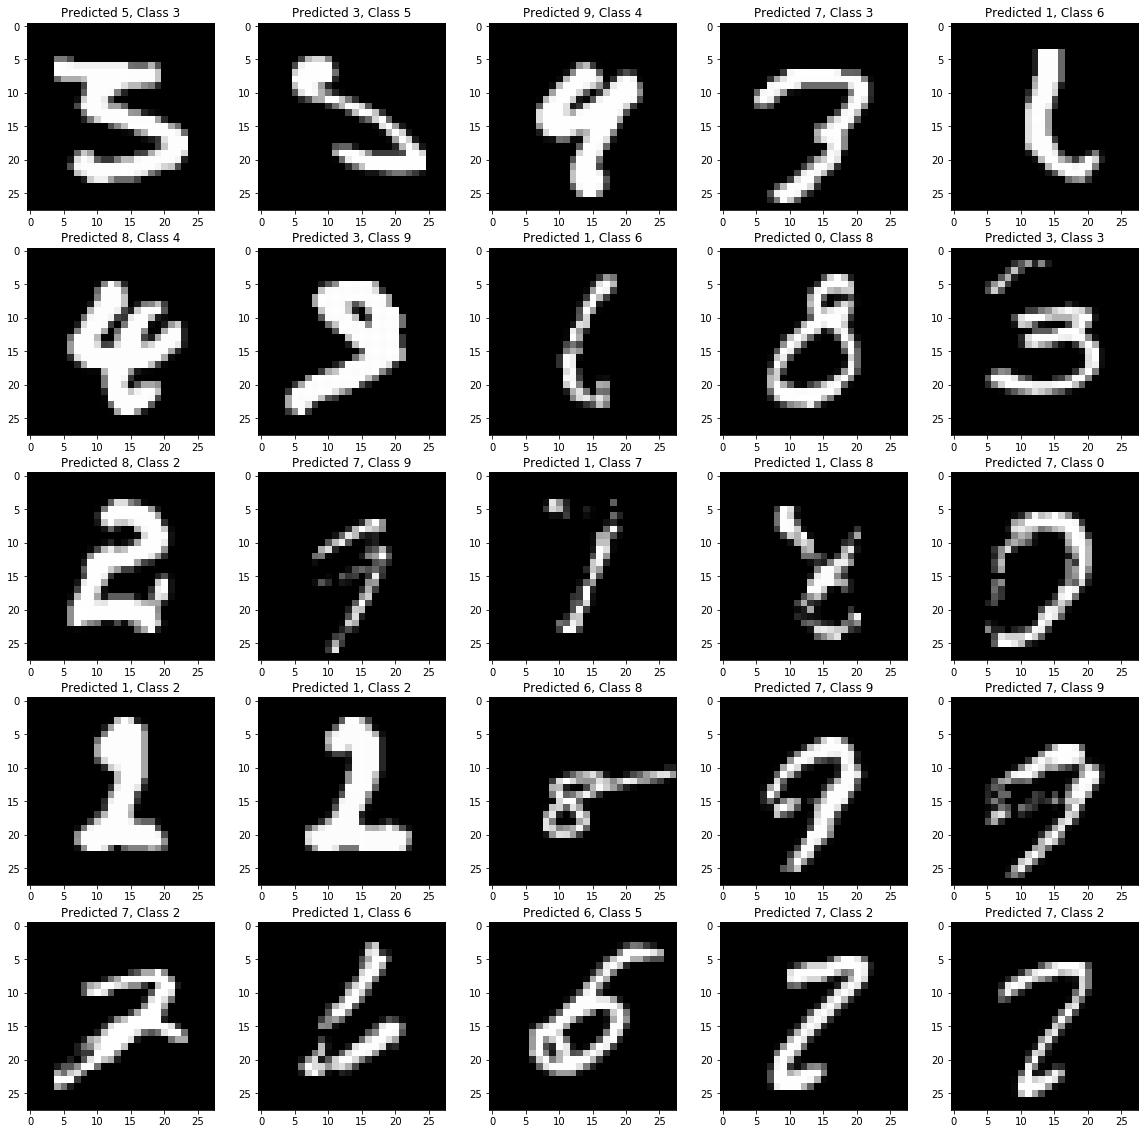

In [36]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(0)
plt.figure(figsize = (20,20)) 
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        plt.imshow(X_test[selected_incorrect_indices[count]].reshape(28,28),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(y_pred[selected_incorrect_indices[count]], y_test[selected_incorrect_indices[count]]))
        count = count+1
plt.show()

Predicted:  8
Actual:  2


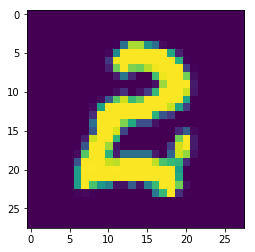

In [37]:
print('Predicted: ',y_pred[5634])
print('Actual: ',y_test[5634])
X_test = X_test.reshape((10000, 28, 28))
# Matplotlib is a plotting library for Python. Pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
from matplotlib import pyplot as plt

# Sets the backend of matplotlib to 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline

# Renders the image.
plt.imshow(X_test[5634])

In [38]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [39]:
# Printing the outputs.
print(y_pred[:19])
print(y_test[:19])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

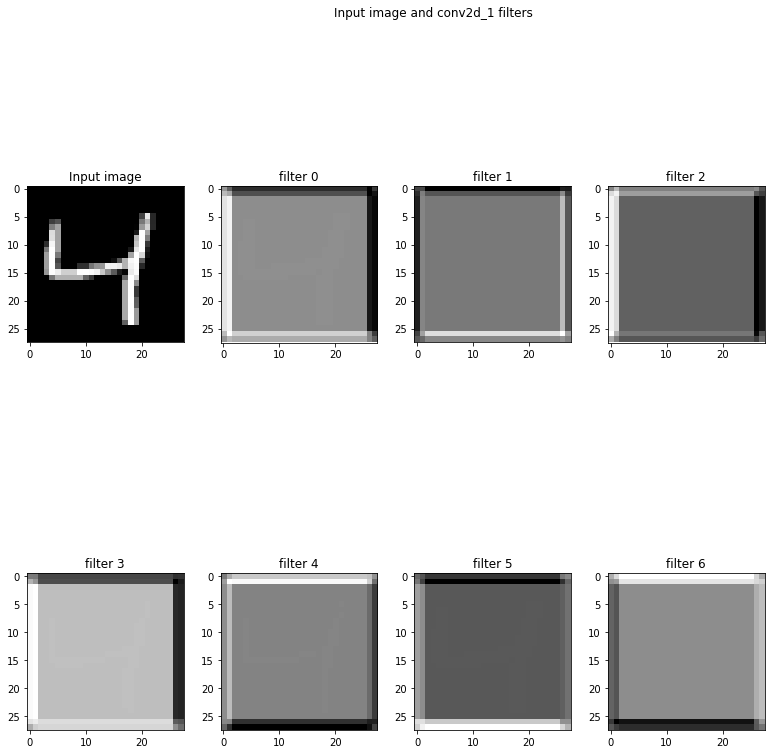

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 2, 4
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()